In [244]:
def d_f(x):
    return 8 * (x ** 3) - 12 * (x ** 2) + 6 * x + 4


def descente_gradient(d_f, x0, alpha=.1, n=2):
    x = x0
    liste_x = [x0]
    for i in range(n):
        x = x - alpha * d_f(x)
        liste_x.append(round(x, 3))
    print("Results starting from x0 = {} are {}".format(x0, liste_x))
    return liste_x

In [245]:
descente_gradient(d_f, 0)

Results starting from x0 = 0 are [0, -0.4, -0.317]


[0, -0.4, -0.317]

In [246]:
descente_gradient(d_f, 10)

Results starting from x0 = 10 are [10, -676.4, 248120326.787]


[10, -676.4, 248120326.787]

The first gradient descend algorithm seems to converge to the minimum of the function, while the second one is clearly diverging. The learning rate is probably too high, and would need to be decreased to get optimal results.

# Exercise 2

In [247]:
from matplotlib import pyplot as plt
import numpy as np

In [248]:
def linear_regression_batch_gradient(X, y, learning_rate=0.01, max_iter=1000):
    m,n = X.shape
    theta = np.zeros(n)  # Initialize the coefficients as zeros
    error = np.inf  # Initialize the training error as infinity
    i = 0
    while i < max_iter and error > 0.001:
        predicted_y = np.dot(X, theta)  # Calculate the predicted values
        # Calculate the gradients and update the coefficients
        theta -= learning_rate * np.dot(X.T, (predicted_y - y)) / m
        error = np.mean((y - predicted_y)**2)
        i += 1
    return theta, error

def linear_regression_stochastic_gradient(X, y, learning_rate=0.01, max_iter=1000):
    m,n = X.shape
    theta = np.zeros(n)  # Initialize the coefficients as zeros
    error = np.inf  # Initialize the training error as infinity
    i = 0
    while i < max_iter and error > 0.001:
        for j in range(m):
            predicted_y = np.dot(X[j], theta)  # Calculate the predicted values
            # Calculate the gradients and update the coefficients
            theta -= learning_rate * np.dot(X[j].T, (predicted_y - y[j])) / m
            error = np.mean((y - predicted_y)**2)
        i += 1
    return theta, error

def linear_regression_mini_batch_gradient(X, y, learning_rate=0.01, max_iter=1000, batch_size=10):
    m,n = X.shape
    theta = np.zeros(n)  # Initialize the coefficients as zeros
    error = np.inf  # Initialize the training error as infinity
    i = 0
    while i < max_iter and error > 0.001:
        for j in range(0, m, batch_size):
            predicted_y = np.dot(X[j:j+batch_size], theta)  # Calculate the predicted values
            # Calculate the gradients and update the coefficients
            theta -= learning_rate * np.dot(X[j:j+batch_size].T, (predicted_y - y[j:j+batch_size])) / m
            error = np.mean((y - predicted_y)**2)
        i += 1
    return theta, error

In [ ]:
# Do simultaneous updates of the coefficients

In [249]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([3, 7, 11, 15])
theta_batch, err_batch = linear_regression_batch_gradient(X, y)
theta_stochastic, err_stochastic = linear_regression_stochastic_gradient(X, y)
theta_mini_batch, err_mini_batch = linear_regression_mini_batch_gradient(X, y)
print("Batch gradient descent: theta = {}, error = {}".format(theta_batch, err_batch))
print("Stochastic gradient descent: theta = {}, error = {}".format(theta_stochastic, err_stochastic))
print("Mini-batch gradient descent: theta = {}, error = {}".format(theta_mini_batch, err_mini_batch))

Batch gradient descent: theta = [0.92273195 1.06460157], error = 0.0009983612786599169
Stochastic gradient descent: theta = [0.96396455 1.03049028], error = 55.86088533870091
Mini-batch gradient descent: theta = [0.92273195 1.06460157], error = 0.0009983612786599169


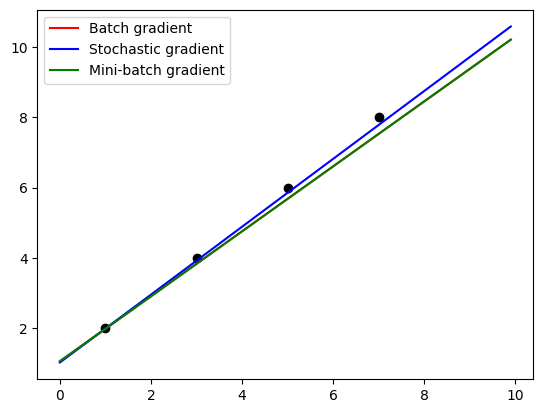

In [250]:
plt.scatter(X[:, 0], X[:, 1],color='black')
def f(x):
    return theta_batch[0] * x + theta_batch[1]
def g(x):
    return theta_stochastic[0] * x + theta_stochastic[1]
def h(x):
    return theta_mini_batch[0] * x + theta_mini_batch[1]
x = np.arange(0, 10, 0.1)
plt.plot(x, f(x), label='Batch gradient', color='r')
plt.plot(x, g(x), label='Stochastic gradient', color='b')
plt.plot(x, h(x), label='Mini-batch gradient', color='g')
plt.legend()